<a href="https://colab.research.google.com/github/sandipanbasu/aiml-capstone/blob/master/mrc-data-with-squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow==2.0

     |████████████████████████████████| 86.3MB 110kB/s 
     |████████████████████████████████| 450kB 41.0MB/s 
     |████████████████████████████████| 3.8MB 33.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c3264f3e0976bc7aeb3a22dd7931df52fe910b49a07aa07cd9e60260a4ecdb99
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installatio

In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from pprint import pprint

In [0]:
project_path = "/content/drive/My Drive/AIML-MRC-Capstone/datasets/Squad2.0/TrainingDataset/"
datafile = project_path+'train-v2.0.json'

In [0]:
with open(datafile) as data_file:
        dataset_json = json.load(data_file)  #on trying to dataset_json.head(n=10),throwing error 'dict' object has no attribute 'head'
       # dataset = dataset_json["data"] #on trying to dataset.head(n=10),throwing error 'list' object has no attribute 'head'

  
  

In [10]:
# Explore JSON file

# Inspect Nested Keys
print('top-level-keys: {}'.format(list(dataset_json.keys())))
print('data keys: {}'.format(list(dataset_json['data'][0].keys())))
print('paragraphs keys: {}'.format(list(dataset_json['data'][0]['paragraphs'][0].keys())))
print('qas keys: {}'.format(list(dataset_json['data'][0]['paragraphs'][0]['qas'][0].keys())))
print('answers keys: {}'.format(list(dataset_json['data'][0]['paragraphs'][0]['qas'][0]['answers'][0].keys())))

top-level-keys: ['version', 'data']
data keys: ['title', 'paragraphs']
paragraphs keys: ['qas', 'context']
qas keys: ['question', 'id', 'answers', 'is_impossible']
answers keys: ['text', 'answer_start']


In [11]:
# Count Corpora
print('Nbr Corpora: {}'.format(len(dataset_json['data'])))

Nbr Corpora: 442


In [12]:
# Count Corpora
print(len(dataset_json['data']))

442


In [13]:
# Print Corpora Titles
pprint(list(pd.json_normalize(dataset_json,'data')['title']))

['Beyoncé',
 'Frédéric_Chopin',
 'Sino-Tibetan_relations_during_the_Ming_dynasty',
 'IPod',
 'The_Legend_of_Zelda:_Twilight_Princess',
 'Spectre_(2015_film)',
 '2008_Sichuan_earthquake',
 'New_York_City',
 'To_Kill_a_Mockingbird',
 'Solar_energy',
 'Kanye_West',
 'Buddhism',
 'American_Idol',
 'Dog',
 '2008_Summer_Olympics_torch_relay',
 'Genome',
 'Comprehensive_school',
 'Republic_of_the_Congo',
 'Prime_minister',
 'Institute_of_technology',
 'Wayback_Machine',
 'Dutch_Republic',
 'Symbiosis',
 'Canadian_Armed_Forces',
 'Cardinal_(Catholicism)',
 'Iranian_languages',
 'Lighting',
 'Separation_of_powers_under_the_United_States_Constitution',
 'Architecture',
 'Human_Development_Index',
 'Southern_Europe',
 'BBC_Television',
 'Arnold_Schwarzenegger',
 'Plymouth',
 'Heresy',
 'Warsaw_Pact',
 'Materialism',
 'Christian',
 'Sony_Music_Entertainment',
 'Oklahoma_City',
 'Hunter-gatherer',
 'United_Nations_Population_Fund',
 'Russian_Soviet_Federative_Socialist_Republic',
 'Alexander_Graham

In [0]:
def convert_squad_to_tidy_df(json_dict, corpus):
    """This function converts the SQuAD JSON data to a Tidy Data Pandas Dataframe.
    
    :param obj json_dict: squad json data
    :param str corpus: name of squad corpora to select subset from json object
    
    :returns: converted json data
    :rtype: pandas dataframe
    
    """
    data = [c for c in json_dict['data'] if c['title']==corpus][0]
    df = pd.DataFrame()    
    data_paragraphs = data['paragraphs']
    for article_dict in data_paragraphs:
        row = []
        for answers_dict in article_dict['qas']:                    
          if answers_dict['is_impossible'] == True:
            for answer in answers_dict['plausible_answers']:
                row.append((c['title'],
                            article_dict['context'], 
                            answers_dict['question'], 
                            answers_dict['id'],
                            '',
                            '',                          
                            answer['answer_start'],
                            answer['text'],
                            answers_dict['is_impossible']
                           ))            
          else:
            for answer in answers_dict['answers']:
                row.append((c['title'],
                            article_dict['context'], 
                            answers_dict['question'], 
                            answers_dict['id'],
                            answer['answer_start'],
                            answer['text'],
                            '',
                            '',
                            answers_dict['is_impossible']
                           ))
        df = pd.concat([df, pd.DataFrame.from_records(row, columns=['title','context', 'question', 'id', 'answer_start', 'answer','plausible_answer_start', 'plausible_answer','is_impossible'])], axis=0, ignore_index=True)
        # df.drop_duplicates(inplace=True)
    return df


 

In [0]:
appended_data = []

lastindex = 0
for c in dataset_json['data']: 
  data = convert_squad_to_tidy_df(dataset_json, c['title'])
  # store DataFrame in list
  appended_data.append(data)

appended_data = pd.concat(appended_data)

In [0]:
appended_data.reset_index(drop=True,inplace = True)

In [0]:
appended_data['is_impossible'].value_counts()

False    86821
True     43498
Name: is_impossible, dtype: int64

In [0]:
appended_data[appended_data['id'] == '5a8d7bf7df8bba001a0f9ab1']

,title,context,question,id,answer_start,answer,plausible_answer_start,plausible_answer,is_impossible
2075,The_Legend_of_Zelda:_Twilight_Princess,The Legend of Zelda: Twilight Princess (Japane...,What category of game is Legend of Zelda: Aust...,5a8d7bf7df8bba001a0f9ab1,,,128,action-adventure,True


In [0]:
appended_data.to_csv( project_path + '/squad_train_data.csv')

# Possible EDAs:
 #Count Plot
 #Number of characters/words
 #Unique words
 #Word Cloud
 #Common Stopwords
 #Analysing punctuation
 #Ngram Analysis
 #Answer type distribution
 #Avg tokens/sentences
 #Comparison within datasets used


In [0]:
#1
#import seaborn as sns
#sns.countplot(data = appended_data, x = "context")
squad_df = pd.read_csv(project_path+'squad_train_data.csv')
squad_df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
squad_df.tail()

,title,context,question,id,answer_start,answer,plausible_answer_start,plausible_answer,is_impossible
130314,Matter,"The term ""matter"" is used throughout physics i...",Physics has broadly agreed on the definition o...,5a7e070b70df9f001a875439,NaN,NaN,485.0,matter,True
130315,Matter,"The term ""matter"" is used throughout physics i...",Who coined the term partonic matter?,5a7e070b70df9f001a87543a,NaN,NaN,327.0,Alfvén,True
130316,Matter,"The term ""matter"" is used throughout physics i...",What is another name for anti-matter?,5a7e070b70df9f001a87543b,NaN,NaN,350.0,Gk. common matter,True
130317,Matter,"The term ""matter"" is used throughout physics i...",Matter usually does not need to be used in con...,5a7e070b70df9f001a87543c,NaN,NaN,529.0,a specifying modifier,True
130318,Matter,"The term ""matter"" is used throughout physics i...",What field of study has a variety of unusual c...,5a7e070b70df9f001a87543d,NaN,NaN,37.0,physics,True


In [23]:
import seaborn as sns
#squad_df.describe()
#sns.countplot(data = squad_df, x = squad_df.context.unique())
squad_df.title.nunique()

442

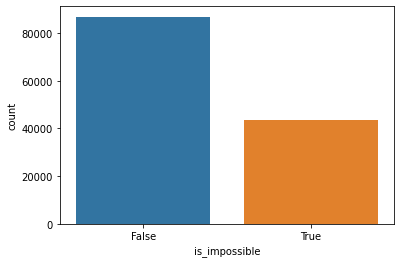

In [28]:
sns.countplot(data = squad_df, x = "is_impossible")

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

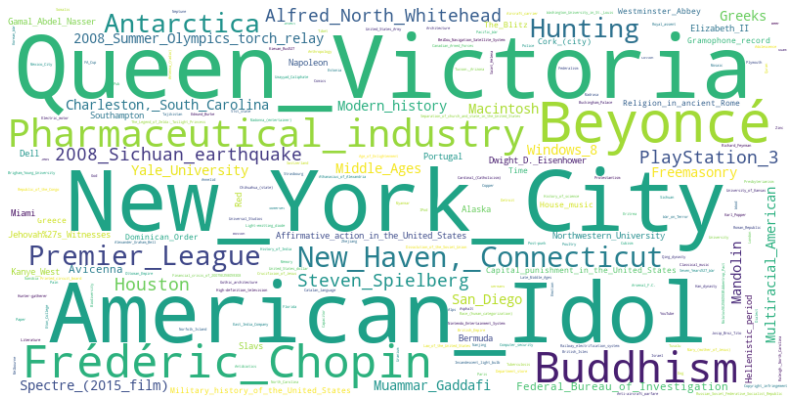

In [27]:
text1 = dict(squad_df.title.value_counts())
wordcloud = WordCloud(width=800, height=400,background_color="white").generate_from_frequencies(text1)
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
# Features..
feature = ['context','question']

# Target
target ='answer'

In [0]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
# Prepare data

# Lemma

# stop word removal

# vectorization tfidvectoriation

# vectorization word2vec


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# Stemming
#Function to Stem words
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [0]:
appended_data['question']

0                  When did Beyonce start becoming popular?
1         What areas did Beyonce compete in when she was...
2         When did Beyonce leave Destiny's Child and bec...
3             In what city and state did Beyonce  grow up? 
4                In which decade did Beyonce become famous?
                                ...                        
130314    Physics has broadly agreed on the definition o...
130315                 Who coined the term partonic matter?
130316                What is another name for anti-matter?
130317    Matter usually does not need to be used in con...
130318    What field of study has a variety of unusual c...
Name: question, Length: 130319, dtype: object

In [0]:
appended_data['context']

0         Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1         Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
2         Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
3         Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
4         Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
                                ...                        
130314    The term "matter" is used throughout physics i...
130315    The term "matter" is used throughout physics i...
130316    The term "matter" is used throughout physics i...
130317    The term "matter" is used throughout physics i...
130318    The term "matter" is used throughout physics i...
Name: context, Length: 130319, dtype: object

In [0]:
appended_data.head()

,title,context,question,id,answer_start,answer,plausible_answer_start,plausible_answer,is_impossible
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,269,in the late 1990s,,,False
1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,207,singing and dancing,,,False
2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,56be85543aeaaa14008c9066,526,2003,,,False
3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,166,"Houston, Texas",,,False
4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,276,late 1990s,,,False


In [0]:
X = appended_data[['context','question']].copy()

In [0]:
X.head()

,context,question
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?


In [0]:
y = appended_data[['answer']].copy()

In [0]:
# y[y['answer'] == ''][:] = 'IMPOSSIBLE'

y.loc[y['answer'] == '', 'answer'] = 'IMPOSSIBLE'

In [0]:
y

,answer
0,in the late 1990s
1,singing and dancing
2,2003
3,"Houston, Texas"
4,late 1990s
...,...
130314,IMPOSSIBLE
130315,IMPOSSIBLE
130316,IMPOSSIBLE
130317,IMPOSSIBLE


In [0]:
X.to_csv(project_path + '/X.csv')
y.to_csv(project_path + '/y.csv')

In [0]:
X = pd.read_csv(project_path + '/X.csv')
X.drop('Unnamed: 0',inplace=True,axis=1)
y = pd.read_csv(project_path + '/y.csv')
y.drop('Unnamed: 0',inplace=True,axis=1)

In [0]:
X.shape
y.shape

(130319, 1)

In [0]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

In [0]:
# remove unwanted chars
# convert to lowercase
# remove unwanted spaces
# remove stop words
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

def preprocess_text(corpus, text_lower_case=True, 
                      special_char_removal=True, stopword_removal=True, remove_digits=False):    
    normalized_text = []
    # normalize each document in the corpus
    for doc in corpus:
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits) 

        if stopword_removal:
            doc = remove_stopwords(doc)

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)            
        normalized_text.append(doc)
        
    return normalized_text

def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def remove_stopwords(text):  
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]   
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)                 
    return ' '.join(filtered_sentence)

In [0]:
X['clean_context'] = preprocess_text(X['context'])

In [0]:
X['clean_question']= preprocess_text(X['question'])

In [0]:
y=y.astype(str)

In [0]:
y['clean_answer']= preprocess_text(y['answer'])

In [0]:
y.head(10)

,answer,clean_answer
0,in the late 1990s,late 1990s
1,singing and dancing,singing dancing
2,2003,2003
3,"Houston, Texas",houston texas
4,late 1990s,late 1990s
5,Destiny's Child,destinys child
6,Dangerously in Love,dangerously love
7,Mathew Knowles,mathew knowles
8,late 1990s,late 1990s
9,lead singer,lead singer


In [0]:
X.head()

,context,question,clean_context,clean_question
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,beyonc giselle knowlescarter bijnse beeyonsay ...,beyonce start becoming popular
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,beyonc giselle knowlescarter bijnse beeyonsay ...,areas beyonce compete growing
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,beyonc giselle knowlescarter bijnse beeyonsay ...,beyonce leave destinys child become solo singer
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,beyonc giselle knowlescarter bijnse beeyonsay ...,city state beyonce grow
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,beyonc giselle knowlescarter bijnse beeyonsay ...,decade beyonce become famous


In [0]:
#merged clean_context and clean_question into clean_question. We will use clean_question as our X
X['question_context']= X['clean_context']+" "+X['clean_question']

In [0]:
X['question_context'][4]

'beyonc giselle knowlescarter bijnse beeyonsay born september 4 1981 american singer songwriter record producer actress born raised houston texas performed various singing dancing competitions child rose fame late 1990s lead singer rb girlgroup destinys child managed father mathew knowles group became one worlds bestselling girl groups time hiatus saw release beyoncs debut album dangerously love 2003 established solo artist worldwide earned five grammy awards featured billboard hot 100 numberone singles crazy love baby boy decade beyonce become famous'

In [0]:
X1=X['question_context']

In [0]:
y1=y['clean_answer']

In [0]:
X1.shape

(130319,)

In [0]:
X1.head(3)

0    beyonc giselle knowlescarter bijnse beeyonsay ...
1    beyonc giselle knowlescarter bijnse beeyonsay ...
2    beyonc giselle knowlescarter bijnse beeyonsay ...
Name: question_context, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X1 = vectorizer.fit_transform(X1)
feature_names = vectorizer.get_feature_names()


In [0]:
print(vectorizer.get_feature_names())


['00', '000', '0000222556', '0001', '00020', '000739w', '001', '0018', '002', '00200', '00200m11', '0028', '0029670', '0029670w', '003', '0042', '0043', '005', '0054', '007', '0071', '0079', '00794', '00s', '00w', '01', '010', '0100', '010000', '011', '012', '0159', '015959', '016', '018', '019', '02', '020', '0200', '0208', '0221023', '022801', '024', '0240', '02431026', '025', '0256', '027', '029', '03', '030', '0300', '030000', '031', '0315', '0321185781', '0321480910', '033', '033s', '0350', '037', '039', '04', '040', '0400', '0419', '0425', '045', '046', '05', '0500', '0530', '056', '05946', '06', '0600', '062', '062801', '0645', '0658', '07', '075', '08', '0800', '09', '0900', '0902', '0920', '0935', '098', '0e', '0fm', '0km', '0km2', '0s', '0the', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '100000125000', '100000salaried', '1000011000', '100009465', '10000s', '10000seat', '10000th', '10001400', '10001500', '10001600', '10003000', '10003000mg', '1

In [0]:
print(X1.shape)

(130319, 100698)


In [0]:
y1 = vectorizer.fit_transform(y1)


In [0]:
feature_names = vectorizer.get_feature_names()


In [0]:
print(vectorizer.get_feature_names())


['00', '000', '00020', '0018', '002', '0028', '0042', '005', '007', '0071', '00794', '00w', '01', '018', '02', '0200', '022801', '024', '02431026', '029', '03', '0300', '030000', '033', '033s', '037', '04', '0400', '045', '05', '0500', '06', '0600', '07', '08', '09', '0s', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '1000011000', '10001400', '10001600', '10003000', '10006000', '1001', '100110', '10021', '1002foot', '10050', '100fold', '100goal', '100l', '100m', '100th', '101', '1010', '10100', '1010408', '1011', '1011300', '1012', '1013', '1014', '1015', '1015000', '1017', '10178', '1019', '101st', '10200', '1020000', '1021', '10217', '1023', '1024', '1024768', '103', '1030', '1031', '10311095', '1032949', '1033', '1035000', '10371137', '103rd', '104', '1040', '104272', '1043', '10431056', '1045', '1049', '105', '1050', '10500', '105000', '1050s', '10521', '1054', '1055', '10550350', '10562178', '106', '106000', '1060s', '10617575', '10640', '10646', '1065', '1066', 

In [0]:
print(y1.shape)

(130319, 41314)
